In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# Read and clean data

In [2]:
data_folder = 'C:/Users/Graham West/Python Notebooks/Meharry Teaching/Datasets/'

df = pd.read_csv(data_folder + 'Real Estate/Real Estate Data.csv', index_col=0, header=0)
df = df.reset_index(drop=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 68 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      1404 non-null   object 
 1   Zoning Class              1404 non-null   object 
 2   Lot Frontage              1151 non-null   float64
 3   Lot Area                  1404 non-null   int64  
 4   Alley                     84 non-null     object 
 5   Lot Shape                 1404 non-null   object 
 6   Land Contour              1404 non-null   object 
 7   Lot Config                1404 non-null   object 
 8   Land Slope                1404 non-null   object 
 9   Nbhd                      1404 non-null   object 
 10  Location Condition        1404 non-null   object 
 11  Bldg Type                 1404 non-null   object 
 12  House Style               1404 non-null   object 
 13  OvQual                    1404 non-null   int64  
 14  Overall 

,Type,Zoning Class,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Nbhd,Location Condition,Bldg Type,House Style,OvQual,Overall Cond,Built,Year Remod Add,Roof Style,Roof Material,Exterior Primary,Masonry/Veneer,Masonry/Veneer Area,Exterior Qual,Exterior Cond,Foundation,Basement Height,Basement Cond,Basement Exposure,Basement Finish,Basement Finished Area,Basement Unfinished Area,Basement Area,Heating Qual,CentralAir,Electrical,1st Floor Area,2nd Floor Area,Living Area Above Grade,Basement Full Baths,Basement Half baths,Full Baths Above Grade,Half Baths Above Grade,Bedrooms Above Grade,Kitchens Above Grade,Kitchen Qual,Total Rooms Above Grade,Functionality,Fireplaces,Fireplce Qual,Garage Type,Garage Yr Built,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Pool Qual,Fence,Sale Type,Sale Condition,Sale Price
0,2-STORY 1946 & NEWER,Resid Low Density,65.0,8450,NaN,Regular,Level,Inside lot,Gentle,College Creek,Normal,1-family Detached,2 story,7,5,2003,2003,Gable,Composite Shingle,Vinyl Siding,Brick Face,196.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,No Exposure,Good Living Quarters,706,150,856,Excellent,Y,Standard Circuit Breakers & Romex,856,854,1710,1,0,2,1,3,1,Good,8,Typical Functionality,0,No Fireplace,Attached to home,2003.0,Rough Finished,2,548,Average,Average,Paved,0,61,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,208500
1,1-STORY 1946 & NEWER,Resid Low Density,80.0,9600,NaN,Regular,Level,Frontage on 2 sides,Gentle,Veenker,Adjacent Feeder St,1-family Detached,1 story,6,8,1976,1976,Gable,Composite Shingle,Metal Siding,NaN,0.0,Average,Average,Cinder Block,"Good (90-99"")",Average,Good Exposure,Avg Living Quarters,978,284,1262,Excellent,Y,Standard Circuit Breakers & Romex,1262,0,1262,0,1,2,0,3,1,Average,6,Typical Functionality,1,Average,Attached to home,1976.0,Rough Finished,2,460,Average,Average,Paved,298,0,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,181500
2,2-STORY 1946 & NEWER,Resid Low Density,68.0,11250,NaN,Slightly irregular,Level,Inside lot,Gentle,College Creek,Normal,1-family Detached,2 story,7,5,2001,2002,Gable,Composite Shingle,Vinyl Siding,Brick Face,162.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,Min Exposure,Good Living Quarters,486,434,920,Excellent,Y,Standard Circuit Breakers & Romex,920,866,1786,1,0,2,1,3,1,Good,6,Typical Functionality,1,Average,Attached to home,2001.0,Rough Finished,2,608,Average,Average,Paved,0,42,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,223500
3,2-STORY 1945 & OLDER,Resid Low Density,60.0,9550,NaN,Slightly irregular,Level,Corner lot,Gentle,Crawford,Normal,1-family Detached,2 story,7,5,1915,1970,Gable,Composite Shingle,Wood Siding,NaN,0.0,Average,Average,Brick & Tile,"Typical (80-89"")",Good,No Exposure,Avg Living Quarters,216,540,756,Good,Y,Standard Circuit Breakers & Romex,961,756,1717,1,0,1,0,3,1,Good,7,Typical Functionality,1,Good,Detached from home,1998.0,Unfinished,3,642,Average,Average,Paved,0,35,272,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,"Abnormal Sale - trade, foreclosure, short sale",140000
4,2-STORY 1946 & NEWER,Resid Low Density,84.0,14260,NaN,Slightly irregular,Level,Frontage on 2 sides,Gentle,Northridge,Normal,1-family Detached,2 story,8,5,2000,2000,Gable,Composite Shingle,Vinyl Siding,Brick Face,350.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,Avg Exposure,Good Living Quarters,655,490,1145,Excellent,Y,Standard Circuit Breakers & Romex,1145,1053,2198,1,0,2,1,4,1,Good,9,Typical Functionality,1,Average,Attached to home,2000.0,Rough Finished,3,836,Average,Average,Paved,192,84,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,250000


### Rename columns

In [3]:
df = df.rename(columns = {'OvQual':'Overall Qual',
                          'Built':'Year',
                          'Garage Yr Built':'Year Garage'})

### Drop Alley column

In [4]:
df = df.drop(columns=['Alley'])

### Fill nans

In [5]:
df.isna().sum(axis=0).sort_values(ascending=False)

Masonry/Veneer              824
Lot Frontage                253
Year Garage                  63
Masonry/Veneer Area           8
Total Rooms Above Grade       0
Garage Type                   0
Fireplce Qual                 0
Fireplaces                    0
Functionality                 0
Type                          0
Garage Finish                 0
Kitchens Above Grade          0
Bedrooms Above Grade          0
Half Baths Above Grade        0
Full Baths Above Grade        0
Basement Half baths           0
Basement Full Baths           0
Kitchen Qual                  0
Garage Cars                   0
2nd Floor Area                0
Garage Area                   0
Garage Qual                   0
Garage Cond                   0
Paved Drive                   0
Wood Deck Area                0
Open Porch Area               0
Enclosed Porch Area           0
3 Season Porch Area           0
Screen Porch Area             0
Pool Area                     0
Pool Qual                     0
Fence   

In [6]:
gb1 = df.groupby(["Nbhd"])['Lot Frontage'].median().sort_values()

def fill_1(r):
    n = r.Nbhd
    
    x = r['Lot Frontage']
    
    if pd.isna(x):
        return gb1[n]
    else:
        return x
    # end
# end

df['Lot Frontage'] = df.apply(fill_1, axis=1)

In [7]:
gb2 = df.groupby(["Nbhd"])['Year Garage'].median().sort_values()

def fill_2(r):
    n = r.Nbhd
    
    x = r['Year Garage']
    
    if pd.isna(x):
        return gb2[n]
    else:
        return x
    # end
# end

df['Year Garage'] = df.apply(fill_2, axis=1)

In [8]:
gb3 = df.groupby(["Nbhd"])['Masonry/Veneer Area'].median().sort_values()

def fill_3(r):
    n = r.Nbhd
    
    x = r['Masonry/Veneer Area']
    
    if pd.isna(x):
        return gb2[n]
    else:
        return x
    # end
# end

df['Masonry/Veneer Area'] = df.apply(fill_3, axis=1)

In [9]:
df.isna().sum(axis=0).sort_values(ascending=False)

Masonry/Veneer              824
Type                          0
Kitchen Qual                  0
Garage Type                   0
Fireplce Qual                 0
Fireplaces                    0
Functionality                 0
Total Rooms Above Grade       0
Kitchens Above Grade          0
1st Floor Area                0
Bedrooms Above Grade          0
Half Baths Above Grade        0
Full Baths Above Grade        0
Basement Half baths           0
Basement Full Baths           0
Living Area Above Grade       0
Year Garage                   0
Garage Finish                 0
Garage Cars                   0
Garage Area                   0
Garage Qual                   0
Garage Cond                   0
Paved Drive                   0
Wood Deck Area                0
Open Porch Area               0
Enclosed Porch Area           0
3 Season Porch Area           0
Screen Porch Area             0
Pool Area                     0
Pool Qual                     0
Fence                         0
Sale Typ

### Drop Masonry/Veneer column

In [10]:
df = df.drop(columns=['Masonry/Veneer'])

# Feature engineering

### Floors

In [11]:
def get_floors(x):
    if x > 0:
        return 2
    else:
        return 1
    # end
# end

df['Floors'] = df['2nd Floor Area'].apply(get_floors)

### Areas

In [12]:
df['Indoor Area'] = df[
    [
        '1st Floor Area', '2nd Floor Area', 'Basement Area'
    ]
].sum(axis=1)

df['Outdoor Area'] = df[
    [
        '3 Season Porch Area', 'Enclosed Porch Area', 'Garage Area',
        'Open Porch Area', 'Pool Area', 'Screen Porch Area', 'Wood Deck Area'
    ]
].sum(axis=1)

df['Basement Finished Area Fraction'] = df['Basement Finished Area'] / df[['Basement Finished Area', 'Basement Unfinished Area']].sum(axis=1)
df['Basement Finished Area Fraction'] = df['Basement Finished Area Fraction'].fillna(0)

In [13]:
df = df.drop(
    columns=[
       '1st Floor Area', '2nd Floor Area', '3 Season Porch Area',
       'Basement Area', 'Basement Finished Area', 'Basement Unfinished Area',
       'Enclosed Porch Area', 'Garage Area', 'Living Area Above Grade',
       'Open Porch Area', 'Pool Area', 'Screen Porch Area', 'Wood Deck Area'
    ]
)

### Label encode qualities

In [14]:
from sklearn.preprocessing import OrdinalEncoder

# Define known categories
quality_order = ["Poor", "Fair", "Average", "Good", "Excellent"]

# Identify categorical columns that contain 'Average'
cols = df.columns[df.isin(['Average']).any(axis=0)]

# Replace unknown values with "Poor"
df[cols] = df[cols].applymap(lambda x: x if x in quality_order else "Poor")

# Initialize and fit OrdinalEncoder on a single-column DataFrame
encoder = OrdinalEncoder(
    categories=[quality_order]
)

encoder.fit(
    np.array(quality_order)[:,np.newaxis]
)

# Transform each column separately in a loop
for c in cols:
    df[c] = encoder.transform(df[[c]]).astype(int)[:,0]
# end

In [15]:
df['Basement Height'] = df['Basement Height'].apply(
    lambda x: x.split(" ")[0]
)

df['Basement Height'] = df['Basement Height'].apply(
    lambda x: x if x != "Typical" else "Average"
)

df['Basement Height'] = df['Basement Height'].apply(
    lambda x: x if x in quality_order else "Poor"
)

df['Basement Height'] = encoder.transform(df[['Basement Height']]).astype(int)[:,0]

In [16]:
df['Pool Qual'] = df['Pool Qual'].apply(
    lambda x: x if x in quality_order else "Poor"
)

df['Pool Qual'] = encoder.transform(df[['Pool Qual']]).astype(int)[:,0]

### Central Air

In [17]:
df['CentralAir'] = df['CentralAir'].replace(
    {
        'Y':1,
        'N':0
    }
)

df = df.rename(
    columns={
        'CentralAir':'Central Air'
    }
)

# Preprocess data

In [18]:
X_raw = df.drop(columns=['Sale Price'])
y = df['Sale Price']

### Split numeric and categorical columns for separate processing

In [19]:
X_num = X_raw.select_dtypes(exclude=object)
X_cat = X_raw.select_dtypes(include=object)

### Process numerical data in several ways

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

X_num_mm = pd.DataFrame()
X_num_ss = pd.DataFrame()
for c in X_num.columns:
    X_num_mm[c] = minmax_scaler.fit_transform(X_num[[c]])[:,0]
    X_num_ss[c] = std_scaler.fit_transform(X_num[[c]])[:,0]
# end

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)

X_num_pca = pd.DataFrame(
    pca.fit_transform(X_num_ss)
)

### Get categorical dummies

In [22]:
X_dum = pd.DataFrame()
for c in X_cat.columns:
    dummy = pd.get_dummies(X_cat[c], prefix=c, dtype=int)
    dummy_sum = dummy.sum(axis=0)
    col_to_drop = dummy_sum.idxmax()
    dummy = dummy.drop(columns=[col_to_drop])
    X_dum = pd.concat([X_dum, dummy], axis=1)
# end
X_dum.head()

,Type_1 STORY PUD,Type_1-1/2 STORY ALL AGES,Type_1-STORY 1945 & OLDER,Type_1-STORY PUD,Type_2 FAMILY CONVERSION,Type_2-1/2 STORY ALL AGES,Type_2-STORY 1945 & OLDER,Type_2-STORY 1946 & NEWER,Type_2-STORY PUD,Type_DUPLEX,Type_SPLIT FOYER,Type_SPLIT OR MULTI-LEVEL,Zoning Class_Commercial,Zoning Class_Floating Village Resid,Zoning Class_Resid High Density,Zoning Class_Resid Med Density,Lot Shape_Irregular,Lot Shape_Slightly irregular,Land Contour_Banked,Land Contour_Depression,Land Contour_Hillside,Lot Config_Corner lot,Lot Config_Cul-de-sac,Lot Config_Frontage on 2 sides,Lot Config_Frontage on 3 sides,Land Slope_Moderate,Land Slope_Severe,Nbhd_Bloomington Heights,Nbhd_Bloomington Hts,Nbhd_Bluestem,Nbhd_Briardale,Nbhd_Brookside,Nbhd_Clear Creek,Nbhd_College Creek,Nbhd_Crawford,Nbhd_Edwards,Nbhd_Gilbert,Nbhd_Iowa DOT and Rail Road,Nbhd_Meadow Village,Nbhd_Mitchell,Nbhd_Northpark Villa,Nbhd_Northridge,Nbhd_Northridge Heights,Nbhd_Northwest Ames,Nbhd_Old Town,Nbhd_Sawyer,Nbhd_Sawyer West,Nbhd_Somerset,Nbhd_South & West of Iowa State,Nbhd_Stone Brook,...,Exterior Primary_Stucco,Exterior Primary_Wood Shingles,Exterior Primary_Wood Siding,Foundation_Brick & Tile,Foundation_Cinder Block,Foundation_Slab,Foundation_Stone,Foundation_Wood,Basement Exposure_Avg Exposure,Basement Exposure_Good Exposure,Basement Exposure_Min Exposure,Basement Exposure_No Basement,Basement Finish_Avg Living Quarters,Basement Finish_Avg Rec Room,Basement Finish_Below Avg Living Quarters,Basement Finish_Low Quality,Basement Finish_No Basement,Basement Finish_Unfinshed,Electrical_60 AMP Fuse Box and mostly Romex wiring (Fair),Electrical_Fuse Box over 60 AMP and all Romex wiring (Average),Functionality_Major Deductions 1,Functionality_Minor Deductions 1,Functionality_Minor Deductions 2,Functionality_Moderate Deductions,Garage Type_Basement Garage,Garage Type_Built-In (Garage with Room),Garage Type_Car Port,Garage Type_Detached from home,Garage Type_More than one type of garage,Garage Type_No Garage,Garage Finish_Finished,Garage Finish_No Garage,Garage Finish_Rough Finished,Paved Drive_Dirt/Gravel,Paved Drive_Partial Pavement,Fence_Good Privacy,Fence_Good Wood,Fence_Minimum Privacy,Fence_Minimum Wood/Wire,Sale Type_Contract 15% Down payment regular terms,Sale Type_Contract Low Down,Sale Type_Contract Low Down payment and low interest,Sale Type_Contract Low Interest,Sale Type_Court Officer Deed/Estate,Sale Type_Home just constructed and sold,Sale Type_Warranty Deed - Cash,"Sale Condition_Abnormal Sale - trade, foreclosure, short sale","Sale Condition_Allocation - two linked properties with separate deeds, typically condo with a garage unit",Sale Condition_Home was not completed when last assessed (associated with New Homes),Sale Condition_Sale between family members
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Modeling

In [23]:
X = pd.concat([X_num_ss, X_dum], axis=1)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

models = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=1, weights='uniform'),
    KNeighborsRegressor(n_neighbors=10, weights='uniform'),
    KNeighborsRegressor(n_neighbors=100, weights='uniform'),
    DecisionTreeRegressor(max_depth=2),
    DecisionTreeRegressor(max_depth=5),
    DecisionTreeRegressor(max_depth=10),
    RandomForestRegressor(n_estimators=10, max_depth=5),
    RandomForestRegressor(n_estimators=100, max_depth=10),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=2),
]

### Cross validation

In [30]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True)

for m in models:
    print(m)
    
    cv_scores = -cross_val_score(m, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
    cv_scores = pd.DataFrame(cv_scores)
    display(cv_scores.describe().T)
    
    print()
# end

LinearRegression()


,count,mean,std,min,25%,50%,75%,max
0,5.0,2.848473e+09,6.366679e+09,0.114661,91954.556893,1.321309e+06,3.418732e+06,1.423754e+10



KNeighborsRegressor(n_neighbors=1)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.134782,0.003356,0.129466,0.134259,0.135413,0.136253,0.138518



KNeighborsRegressor(n_neighbors=10)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.115998,0.016429,0.096709,0.104829,0.115961,0.123569,0.138921



KNeighborsRegressor(n_neighbors=100)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.138971,0.0073,0.129967,0.132935,0.140448,0.144899,0.146608



DecisionTreeRegressor(max_depth=2)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.203124,0.007038,0.19356,0.199812,0.20227,0.209388,0.21059



DecisionTreeRegressor(max_depth=5)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.143966,0.010997,0.131449,0.135265,0.142838,0.154655,0.15562



DecisionTreeRegressor(max_depth=10)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.141496,0.008627,0.130507,0.135418,0.144003,0.145055,0.152498



RandomForestRegressor(max_depth=5, n_estimators=10)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.125071,0.013537,0.110019,0.120347,0.123379,0.124604,0.147005



RandomForestRegressor(max_depth=10)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.100118,0.004494,0.093989,0.097647,0.100842,0.102385,0.105726



GradientBoostingRegressor(max_depth=2)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.096233,0.005176,0.091285,0.093008,0.093377,0.10046,0.103034


### GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV

# Define models and their parameter grids
param_grids = {
    "KNeighborsRegressor": (
        KNeighborsRegressor(),
        {
            "n_neighbors": [1, 5, 10, 20, 50],
            "weights": ["uniform", "distance"]
        }
    ),
    
    "RandomForestRegressor": (
        RandomForestRegressor(),
        {
            "n_estimators": [10, 50, 100],
            "max_depth": [3, 5, 10],
            "min_samples_split": [2, 5, 10],
            'min_samples_leaf': [1, 2, 5, 10]
        }
    ),
    
    "GradientBoostingRegressor": (
        GradientBoostingRegressor(),
        {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [2, 3, 5],
            'min_samples_leaf': [1, 2, 5, 10]
        }
    )
}

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True)

# Store results
results = []

# Perform GridSearchCV for each model
for name, (model, param_grid) in param_grids.items():
    print(f"Performing GridSearchCV for {name}...")
    
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring="neg_mean_absolute_percentage_error", n_jobs=-1)
    grid_search.fit(X, y)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    results.append({"Model": name, "Best Score": best_score, "Best Params": best_params})
# end

results

Performing GridSearchCV for KNeighborsRegressor...
Performing GridSearchCV for RandomForestRegressor...
Performing GridSearchCV for GradientBoostingRegressor...


[{'Model': 'KNeighborsRegressor',
  'Best Score': -0.11252265894728908,
  'Best Params': {'n_neighbors': 5, 'weights': 'distance'}},
 {'Model': 'RandomForestRegressor',
  'Best Score': -0.09798709012131682,
  'Best Params': {'max_depth': 10,
   'min_samples_leaf': 2,
   'min_samples_split': 2,
   'n_estimators': 100}},
 {'Model': 'GradientBoostingRegressor',
  'Best Score': -0.09081258601599515,
  'Best Params': {'learning_rate': 0.1,
   'max_depth': 3,
   'min_samples_leaf': 5,
   'n_estimators': 200}}]

# Parsimony (remove excess features)

### Feature importance

In [37]:
# Fit a Random Forest model
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(X, y)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances = importances[:100]

features_rf = importances.index

X_pars = X[ features_rf ]
importances

Indoor Area                                                                             0.412107
Overall Qual                                                                            0.370768
Year                                                                                    0.025205
Lot Area                                                                                0.015455
Outdoor Area                                                                            0.014161
Basement Finished Area Fraction                                                         0.012314
Year Remod Add                                                                          0.012154
Kitchen Qual                                                                            0.012131
Garage Cars                                                                             0.010794
Masonry/Veneer Area                                                                     0.009351
Basement Height               

<Axes: >

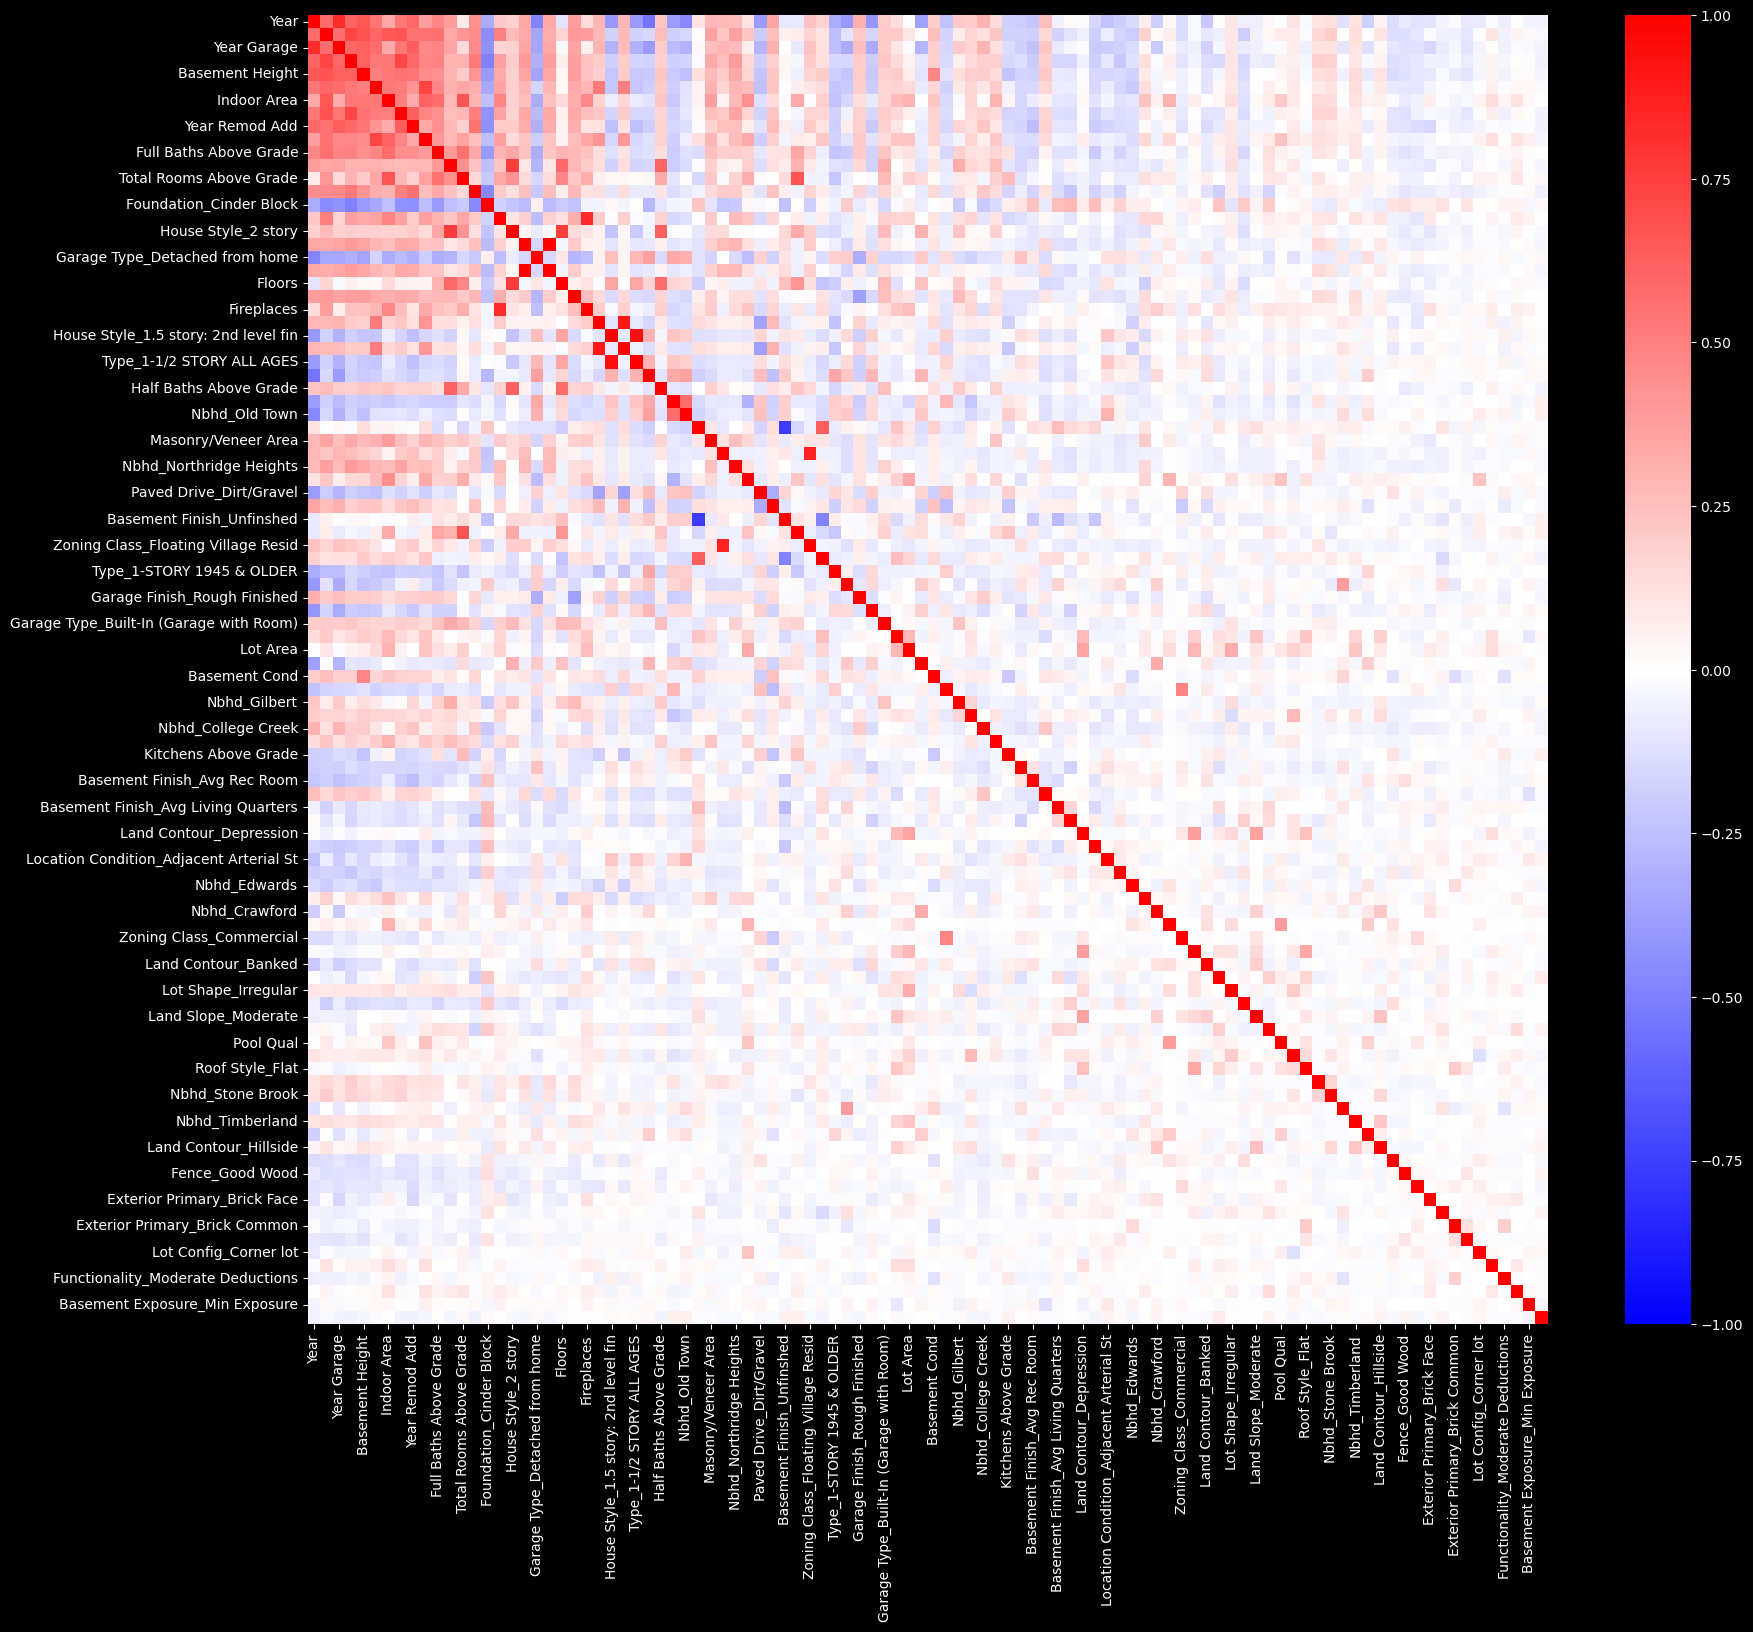

In [39]:
corr = X_pars.corr()

# Sort columns by correlation for easy visuals
total_r2 = (corr**2).sum().sort_values(ascending=False)
sorted_columns = total_r2.index
corr = corr.loc[sorted_columns, sorted_columns]

plt.figure(figsize=(20, 17))
sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    cmap='bwr'
)

### Dimension reduction w/ PCA

Run a cross validation using different numbers of PCA components and plot R2 vs. number of components

In [112]:
# Define PCA components to test
n_pca_feat = [1, 2, 3, 5, 10, 20, 30, 50]

# Compute PCA once for the maximum number of components
max_pca_components = max(n_pca_feat)
pca = PCA(n_components=max_pca_components)
X_pars_pca = pca.fit_transform(X_pars)

# Initialize variables
mean_r2s = []

kf = KFold(n_splits=5, shuffle=True)  # Define K-Fold once
model = RandomForestRegressor()

# Iterate over the different numbers of PCA components
for i in tqdm(n_pca_feat, ncols=50):
    # Compute cross-validation scores
    cv_scores = cross_val_score(model, X_pars_pca[:, :i], y, cv=kf, scoring='r2')

    # Append mean R² score
    mean_r2s.append(np.mean(cv_scores))
# end

# Convert results to NumPy array
mean_r2s = np.array(mean_r2s)

100%|███████████████| 8/8 [00:23<00:00,  2.89s/it]


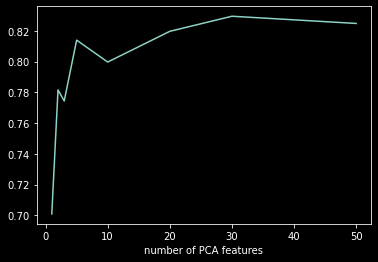

In [113]:
plt.plot(n_pca_feat, mean_r2s)
plt.xlabel("r2 score")
plt.xlabel("number of PCA features")
plt.show()

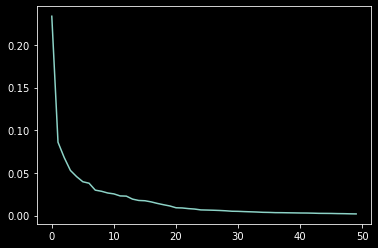

In [117]:
plt.plot(pca.explained_variance_ratio_)

### Variance Inflation Factor

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_pars_with_const = sm.add_constant(X_pars)

vif = pd.Series(
    [variance_inflation_factor(X_pars_with_const.values, i) for i in range(X_pars_with_const.shape[1])],
    index=X_pars_with_const.columns
).sort_values(ascending=False)

vif[:25]

Sale Type_Home just constructed and sold                                                41.514965
Sale Condition_Home was not completed when last assessed (associated with New Homes)    41.441326
const                                                                                   28.564647
House Style_2 story                                                                     13.536911
House Style_1.5 story: 2nd level fin                                                    13.131497
Floors                                                                                  13.068174
Year                                                                                    11.519651
Type_1-1/2 STORY ALL AGES                                                               11.192408
Garage Qual                                                                              6.483167
Garage Cond                                                                              6.464946
Indoor Area         

In [41]:
# Copy dataset to avoid modifying the original
X_vif = X_pars.copy()

# Iteratively remove features with high VIF
while True:
    # Add constant for intercept
    X_vif_with_const = sm.add_constant(X_vif)
    
    # Compute VIF for all features
    vif_series = pd.Series(
        [variance_inflation_factor(X_vif_with_const.values, i) for i in range(X_vif_with_const.shape[1])],
        index=X_vif_with_const.columns
    )
    
    # Exclude constant term and get the feature with the highest VIF
    vif_series = vif_series.drop('const', errors='ignore')
    highest_vif_feature = vif_series.idxmax()
    #display(vif_series)
    
    # Break the loop if all features have VIF ≤ 10
    if vif_series.loc[highest_vif_feature] <= 10:  # Checking the first feature after 'const'
        break

    # Drop the feature with the highest VIF
    X_vif = X_vif.drop(columns=[highest_vif_feature])

    print(f"Dropped: {highest_vif_feature} (VIF={vif_series.loc[highest_vif_feature]:.2f})")
# end

vif_series[:25]

Dropped: Sale Type_Home just constructed and sold (VIF=41.51)
Dropped: House Style_2 story (VIF=13.54)
Dropped: Year (VIF=11.48)
Dropped: Type_1-1/2 STORY ALL AGES (VIF=11.07)


Indoor Area                        6.235229
Overall Qual                       4.610326
Lot Area                           1.816871
Outdoor Area                       3.454546
Basement Finished Area Fraction    4.013486
Year Remod Add                     3.142782
Kitchen Qual                       2.959471
Garage Cars                        3.904807
Masonry/Veneer Area                1.422712
Basement Height                    3.761806
Lot Frontage                       2.015650
Year Garage                        4.420865
Overall Cond                       2.070153
Total Rooms Above Grade            4.713657
Full Baths Above Grade             3.374606
Fireplaces                         4.091464
Fireplce Qual                      4.276042
Central Air                        1.546279
Bedrooms Above Grade               2.642304
Exterior Qual                      3.520710
Lot Config_Corner lot              1.174866
Land Contour_Banked                1.255582
Pool Qual                       

### Re-fit models

In [44]:
from sklearn.model_selection import GridSearchCV

# Define models and their parameter grids
param_grids = {
    "KNeighborsRegressor": (
        KNeighborsRegressor(),
        {
            "n_neighbors": [1, 5, 10, 20, 50],
            "weights": ["uniform", "distance"]
        }
    ),
    
    "RandomForestRegressor": (
        RandomForestRegressor(),
        {
            "n_estimators": [10, 50, 100],
            "max_depth": [3, 5, 10],
            "min_samples_split": [2, 5, 10],
            'min_samples_leaf': [1, 2, 5, 10]
        }
    ),
    
    "GradientBoostingRegressor": (
        GradientBoostingRegressor(),
        {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [2, 3, 5],
            'min_samples_leaf': [1, 2, 5, 10]
        }
    )
}

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True)

# Store results
results = []

# Perform GridSearchCV for each model
for name, (model, param_grid) in param_grids.items():
    print(f"Performing GridSearchCV for {name}...")
    
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring="neg_mean_absolute_percentage_error", n_jobs=-1)
    grid_search.fit(X_vif, y)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    results.append({"Model": name, "Best Score": best_score, "Best Params": best_params})
# end

results

Performing GridSearchCV for KNeighborsRegressor...
Performing GridSearchCV for RandomForestRegressor...
Performing GridSearchCV for GradientBoostingRegressor...


[{'Model': 'KNeighborsRegressor',
  'Best Score': -0.11206344225773475,
  'Best Params': {'n_neighbors': 5, 'weights': 'distance'}},
 {'Model': 'RandomForestRegressor',
  'Best Score': -0.09998989092490683,
  'Best Params': {'max_depth': 10,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 100}},
 {'Model': 'GradientBoostingRegressor',
  'Best Score': -0.08751745111514306,
  'Best Params': {'learning_rate': 0.1,
   'max_depth': 3,
   'min_samples_leaf': 1,
   'n_estimators': 200}}]

### Lasso

You **MUST** standard scale before doing Lasso with multiple variables so that they are all treated equally.

In [45]:
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_lasso = scaler.fit_transform(X_pars)

X_lasso_train, X_lasso_test, y_train, y_test = train_test_split(X_lasso, y, test_size=0.2)

In [46]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Define alpha values
alphas = np.linspace(1, 100000, 100)

# Initialize storage arrays
r2s_train = []
r2s_test  = []
mse_train = []
mse_test  = []
coefs     = []
non_zero  = []

for a in alphas:
    model = Lasso(alpha=a)  # Switch to Ridge(alpha=a) if needed

    model.fit(X_lasso_train, y_train)
    y_train_pred = model.predict(X_lasso_train)
    y_test_pred = model.predict(X_lasso_test)
    
    # Compute R² scores
    r2s_train.append(r2_score(y_train, y_train_pred))
    r2s_test.append(r2_score(y_test, y_test_pred))
    
    # Compute MSE
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

    # Store coefficients
    coefs.append(model.coef_)

    # Get number of non-zero coefficients
    non_zero.append( (model.coef_ != 0).sum() )
# end

# Convert to NumPy arrays for efficient computation
r2s_train = np.array(r2s_train)
r2s_test  = np.array(r2s_test)
mse_train = np.array(mse_train)
mse_test  = np.array(mse_test)
coefs     = np.array(coefs)
non_zero  = np.array(non_zero)

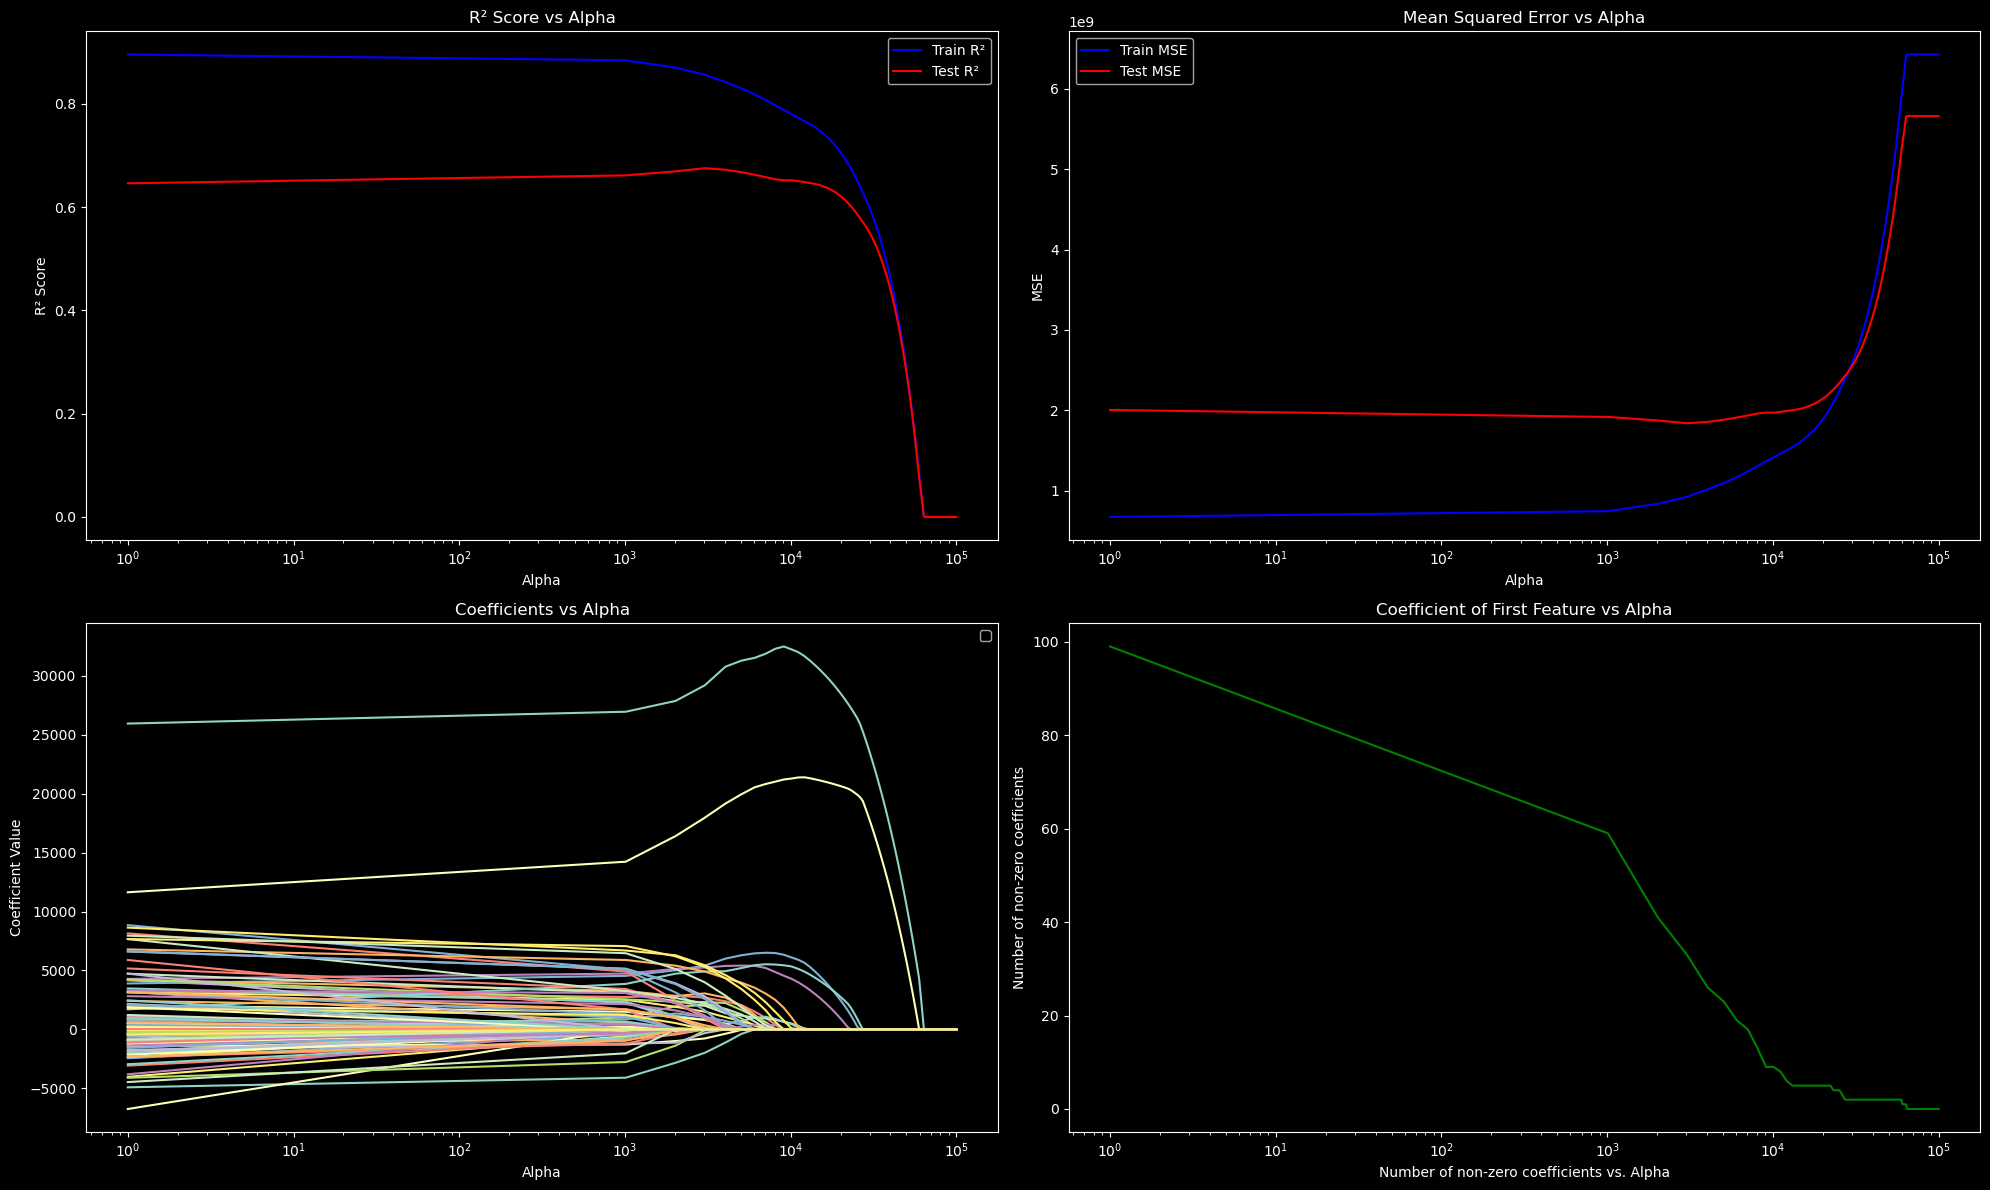

In [47]:
# Create figure with 3 subplots side by side
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()

# Plot R² scores (Train vs. Test)
axes[0].semilogx(alphas, r2s_train, 'b', label="Train R²")
axes[0].semilogx(alphas, r2s_test, 'r', label="Test R²")
axes[0].set_title("R² Score vs Alpha")
axes[0].set_xlabel("Alpha")
axes[0].set_ylabel("R² Score")
axes[0].legend()

# Plot MSE values (Train vs. Test)
axes[1].semilogx(alphas, mse_train, 'b', label="Train MSE")
axes[1].semilogx(alphas, mse_test, 'r', label="Test MSE")
axes[1].set_title("Mean Squared Error vs Alpha")
axes[1].set_xlabel("Alpha")
axes[1].set_ylabel("MSE")
axes[1].legend()

# Plot first feature's coefficients across alpha values
for i in range(coefs.shape[1]):
    axes[2].semilogx( alphas, coefs[:,i] )
# end
axes[2].set_title("Coefficients vs Alpha")
axes[2].set_xlabel("Alpha")
axes[2].set_ylabel("Coefficient Value")
axes[2].legend()

# Plot first feature's coefficients across alpha values
axes[3].semilogx(alphas, non_zero, 'g', label="Coef[0]")
axes[3].set_title("Coefficient of First Feature vs Alpha")
axes[3].set_xlabel("Number of non-zero coefficients vs. Alpha")
axes[3].set_ylabel("Number of non-zero coefficients")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [48]:
model = Lasso(alpha=5000)

model.fit(X_pars, y)

coef = model.coef_
coef = pd.Series(coef, index=X_pars.columns).sort_values(ascending=False)
coef

Indoor Area                                                                             24272.717257
Overall Qual                                                                            21719.389305
Kitchen Qual                                                                             7368.605733
Exterior Qual                                                                            6098.686266
Garage Cars                                                                              5181.277650
Outdoor Area                                                                             4619.468129
Basement Height                                                                          2651.262893
Basement Finished Area Fraction                                                          2651.154842
Total Rooms Above Grade                                                                  2243.999334
Fireplce Qual                                                                            20